<div>
<img src="https://mms.businesswire.com/media/20210430005117/en/720952/23/OM_logo_fullcolor-Dark.jpg" width="300"/>
</div>

## Stock Options Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import datetime
import numpy as np
import matplotlib
import matplotlib as mpl

#mpl.rcParams['figure.dpi']= 50

In [2]:
os.getcwd()

'/home/jupyter-riley/FE-620/Python'

In [3]:
df = pd.read_excel('Data/OPTIONS_APPL.xlsx', sheet_name = 'jtymg7d6kmxpnhde')

In [4]:
print(df.shape)

(36786, 34)


In [5]:
df['Volume']=df['Volume'].astype(int)

In [6]:
df.head()

,Security ID,The Date of this Price,Option Symbol,0=Old option notation 1=New OSI symbol,Expiration Date of the Option,Date on Which the Option Last Traded,"C=Call, P=Put",Strike Price of the Option Times 1000,Highest Closing Bid Across All Exchanges,Lowest Closing Ask Across All Exchanges,...,SIC Code,Index Flag,Exchange Designator,Class Designator,The Type of Security,Industry Group,Description of the Issuing Company,Method of Incorporating Dividends Into the Option Calculations,"(A)merican, (E)uropean, or ?",AM Settlement Flag
0,101594,2014-03-03,AAPL 140307C400000,1,2014-03-07,2014-02-20,C,400000,126.05,127.80,...,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
1,101594,2014-03-03,AAPL 140307C410000,1,2014-03-07,NaT,C,410000,116.05,117.80,...,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
2,101594,2014-03-03,AAPL 140307C420000,1,2014-03-07,NaT,C,420000,106.05,107.90,...,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
3,101594,2014-03-03,AAPL 140307C430000,1,2014-03-07,NaT,C,430000,96.05,97.85,...,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0
4,101594,2014-03-03,AAPL 140307C440000,1,2014-03-07,2014-02-19,C,440000,86.05,87.85,...,3571,0,4,NaN,0,314,APPLE INC,NaN,A,0


In [7]:
df.columns

Index(['Security ID', 'The Date of this Price', 'Option Symbol',
       '0=Old option notation 1=New OSI symbol',
       'Expiration Date of the Option', 'Date on Which the Option Last Traded',
       'C=Call, P=Put', 'Strike Price of the Option Times 1000',
       'Highest Closing Bid Across All Exchanges',
       'Lowest  Closing Ask Across All Exchanges', 'Volume',
       'Open Interest for the Option', 'Implied Volatility of the Option',
       'Delta of the Option', 'Gamma of the Option',
       'Vega/Kappa of the Option', 'Theta of the Option',
       'Unique ID for the Option Contract', 'Cumulative Adjustment Factor',
       'Settlement Flag: 0=Standard, 1=Non-std, E=Non-std Exp. Date',
       'Root of the Option Symbol', 'Suffix of the Option Symbol',
       'CUSIP Number', 'Ticker Symbol', 'SIC Code', 'Index Flag',
       'Exchange Designator', 'Class Designator', 'The Type of Security',
       'Industry Group', 'Description of the Issuing Company',
       'Method of Incorpora

In [8]:

def box_hist(df, x_var_name, n_bins, x_limit):
    n_row, n_col = df.shape
    var = list(df[x_var_name])
    new_var = [x for x in var if str(x) != 'nan']

    l = len(new_var)

    percent_blank = round(((n_row - l) / n_row)*100, ndigits=2)
    print("percent blank = " + str(percent_blank))
    colors =  ['#0E4D92']

    sns.set(font_scale = 1.2)
    sns.set_style("whitegrid")
    f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, sharex=True, figsize=(8, 6.5))

    
    bp = a0.boxplot(new_var, vert = False, patch_artist=True, showmeans=True)
    a0.axes.get_yaxis().set_visible(False)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    a1.hist(new_var, bins = n_bins, color = colors[0])
    a1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x), ',')))

    #if max(new_var) > 10000:        
    #print("MIN X " + str(min_plot_window) + "  MAX PLOT " + str(max_plot_window))
    plt.xlim(x_limit[0], x_limit[1] )
    plt.ylabel("Count")

    plt.xlabel(x_var_name)
    f.tight_layout()

In [9]:
## CREATE TIME SERIES FOR THIS ONE!!
#x-axis = time to expire
#y-axis = options volume

In [10]:
# THIS IS A BUNCH OF 0's
#box_hist(df, 'Volume')

percent blank = 0.0


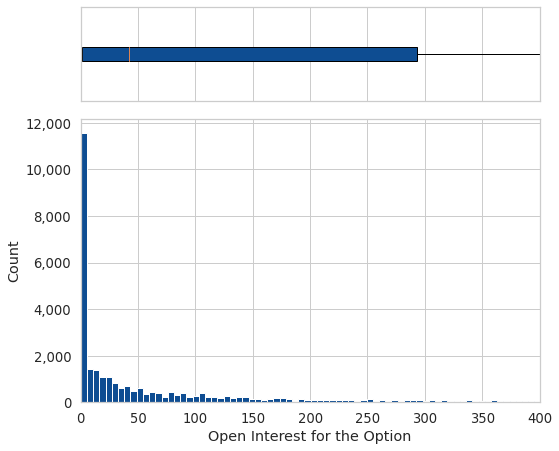

In [11]:
box_hist(df, 'Open Interest for the Option', 9000, [0,400])

percent blank = 45.99


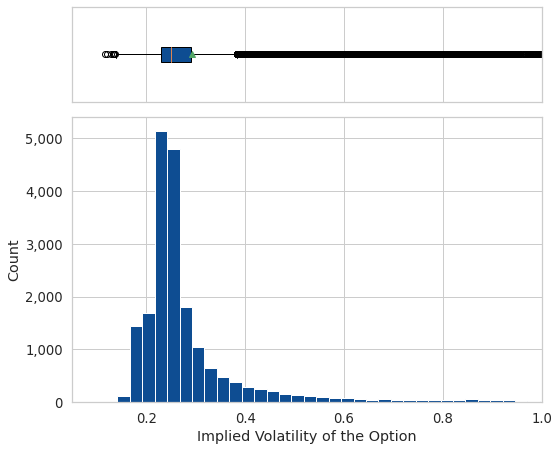

In [12]:
box_hist(df, 'Implied Volatility of the Option', 100, [.05, 1])

percent blank = 45.99


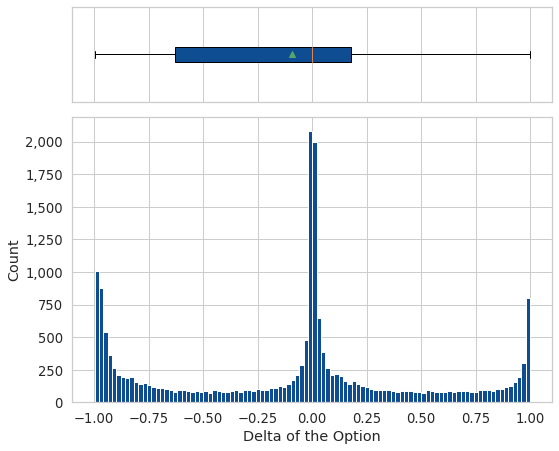

In [13]:
box_hist(df, 'Delta of the Option', 100, [-1.1, 1.1])

percent blank = 45.99


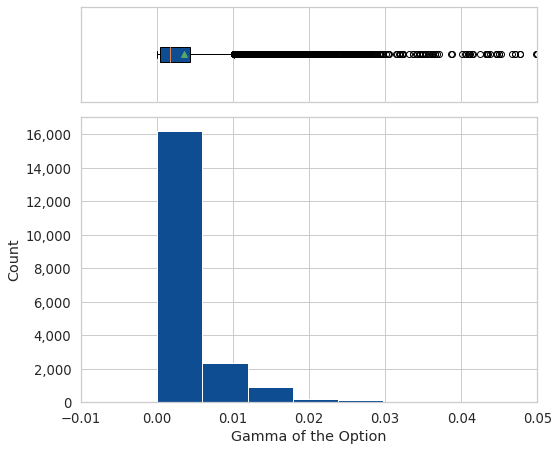

In [14]:
box_hist(df, 'Gamma of the Option',11, [-.01,.05])

percent blank = 45.99


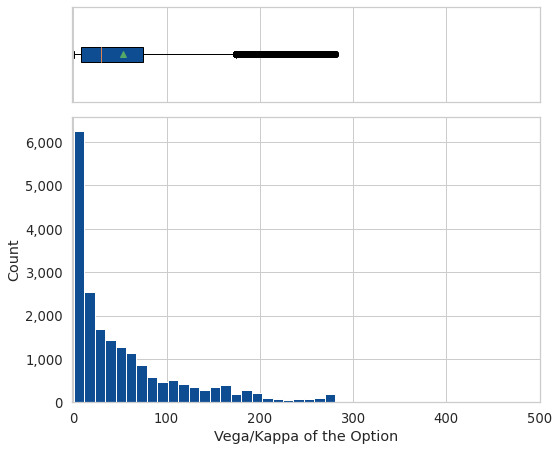

In [15]:
box_hist(df, 'Vega/Kappa of the Option', 25, [-1,500])

percent blank = 45.99


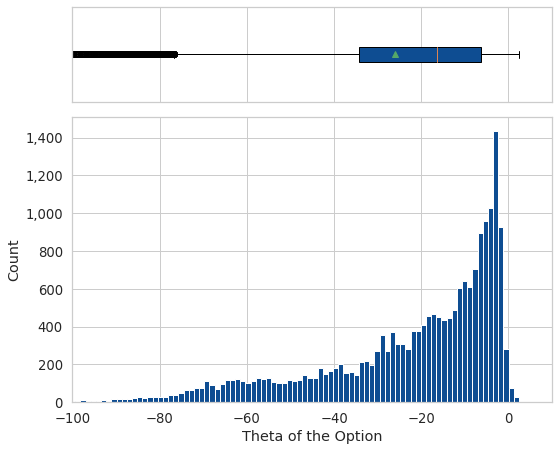

In [16]:
box_hist(df, 'Theta of the Option',500, [-100,10])

percent blank = 0.0


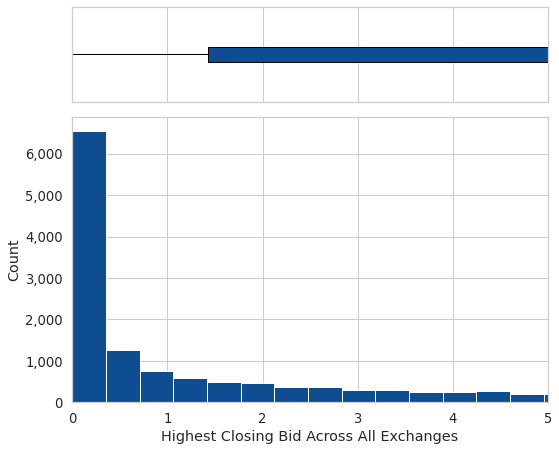

In [17]:
box_hist(df, 'Highest Closing Bid Across All Exchanges',1500, [0,5])

<AxesSubplot:xlabel='Implied Volatility of the Option', ylabel='Highest Closing Bid Across All Exchanges'>

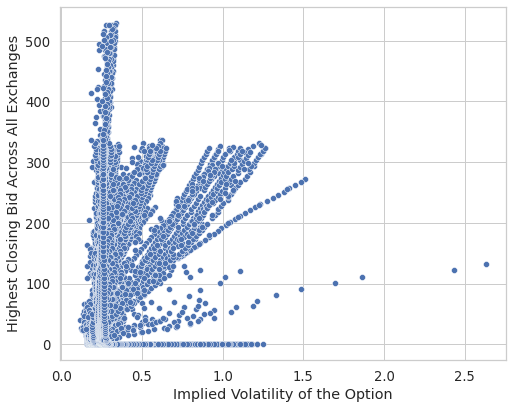

In [18]:
x_name = 'Implied Volatility of the Option'
y_name = 'Highest Closing Bid Across All Exchanges'

plt.subplots(figsize = (8,6.5))
sns.scatterplot(data=df, x=x_name, y=y_name)